In [1]:
import numpy as np
import openpyxl

# Define the data
features = np.array([
    [0.56, 0.21],
    [0.67, 0.34],
    [0.24, 0.41],
    [0.52, 0.92],
    [0.34, 0.64],
    [0.87, 0.43],
    [0.33, 0.82],
    [0.55, 0.23],
    [0.62, 0.44],
    [0.81, 0.45],
    [0.30, 0.51],
    [0.62, 0.51],
])

labels = np.array([
    "Flexion",
    "Flexion",
    "Extension",
    "Extension",
    "Extension",
    "Flexion",
    "Extension",
    "Flexion",
    "Extension",
    "Flexion",
    "Extension",
    "Flexion",
])

# Create a new workbook
wb = openpyxl.Workbook()
ws = wb.active

# Write the header row
ws.append(["Trial no.", "Feature 1", "Feature 2", "Intended movement"])

# Write the data rows
for i, (feature, label) in enumerate(zip(features, labels)):
    ws.append([i + 1, feature[0], feature[1], label])

# Save the workbook
wb.save("lda_results.xlsx")

print("LDA results saved to lda_results.xlsx")

LDA results saved to lda_results.xlsx


In [8]:
df = pd.read_csv('./Data/zoo_python.csv')
df = df.dropna()
df = df.drop('uniq_id', axis=1)
df.head()

,animal,water_need,food
0,elephant,500,vegetables
1,elephant,600,vegetables
2,elephant,550,vegetables
3,tiger,300,meat
4,tiger,320,meat


In [10]:
X = pd.get_dummies(df.drop("animal", axis=1), drop_first=True)
y = df["animal"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array(['lion', 'elephant', 'tiger', 'elephant', 'lion', 'zebra', 'zebra'],
      dtype=object)

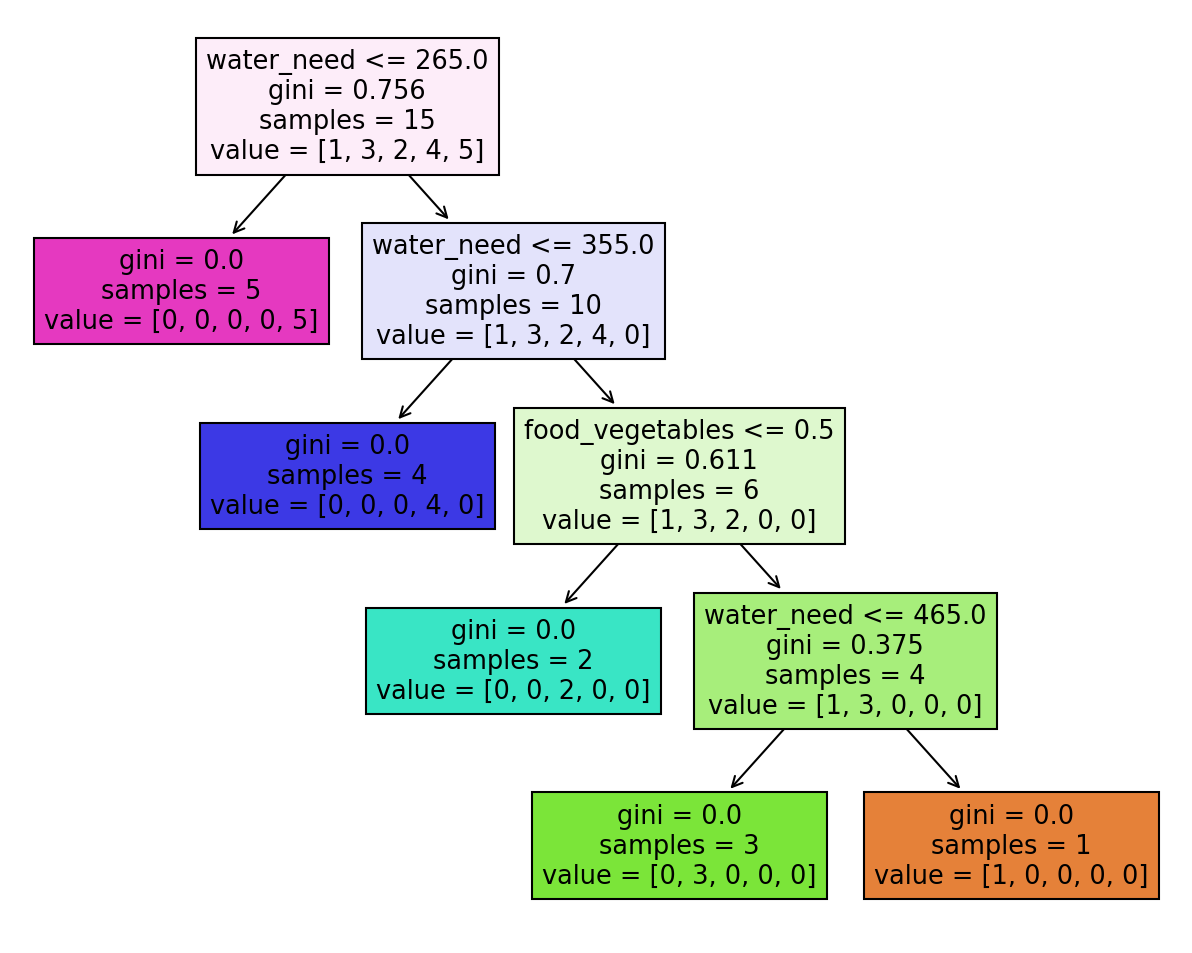

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns, filled=True)

epochs = 0
10.071967154740356 1.6183236879368053


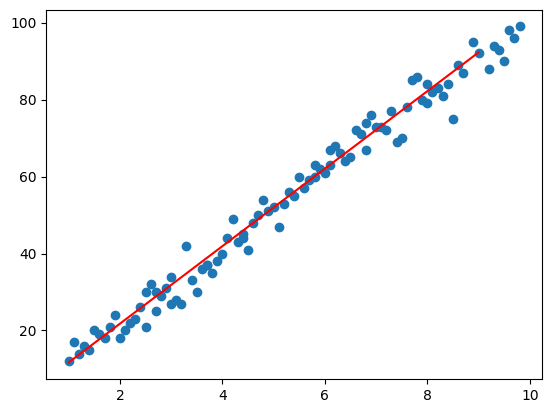

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('./Data/score_updated.csv')
df = df.dropna()
df.head()

def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].CGPA
        y = points.iloc[i].ChanceofAdmit
        total_error += (y - (m * x + b)) ** 2
    total_error / float(len(points))

def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        m_gradient += -(2 / n) * x * (y - (m_now * x - b_now))
        b_gradient += -(2 / n) * (y - (m_now * x - b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

m = 0
b = 0
L = 0.0001
epochs = 500
for i in range(epochs):
    if i % 500 == 0:
        print(f'epochs = {i}')
    m, b = gradient_descent(m, b, df, L)
print(m, b)

plt.scatter(df.Hours, df.Scores)
plt.plot(list(range(1,10)), [m * x + b for x in range(1,10)], color = "red")
plt.show()